In [93]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [94]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [95]:
df= pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [96]:
df.shape

(7043, 21)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [98]:

df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

<Axes: >

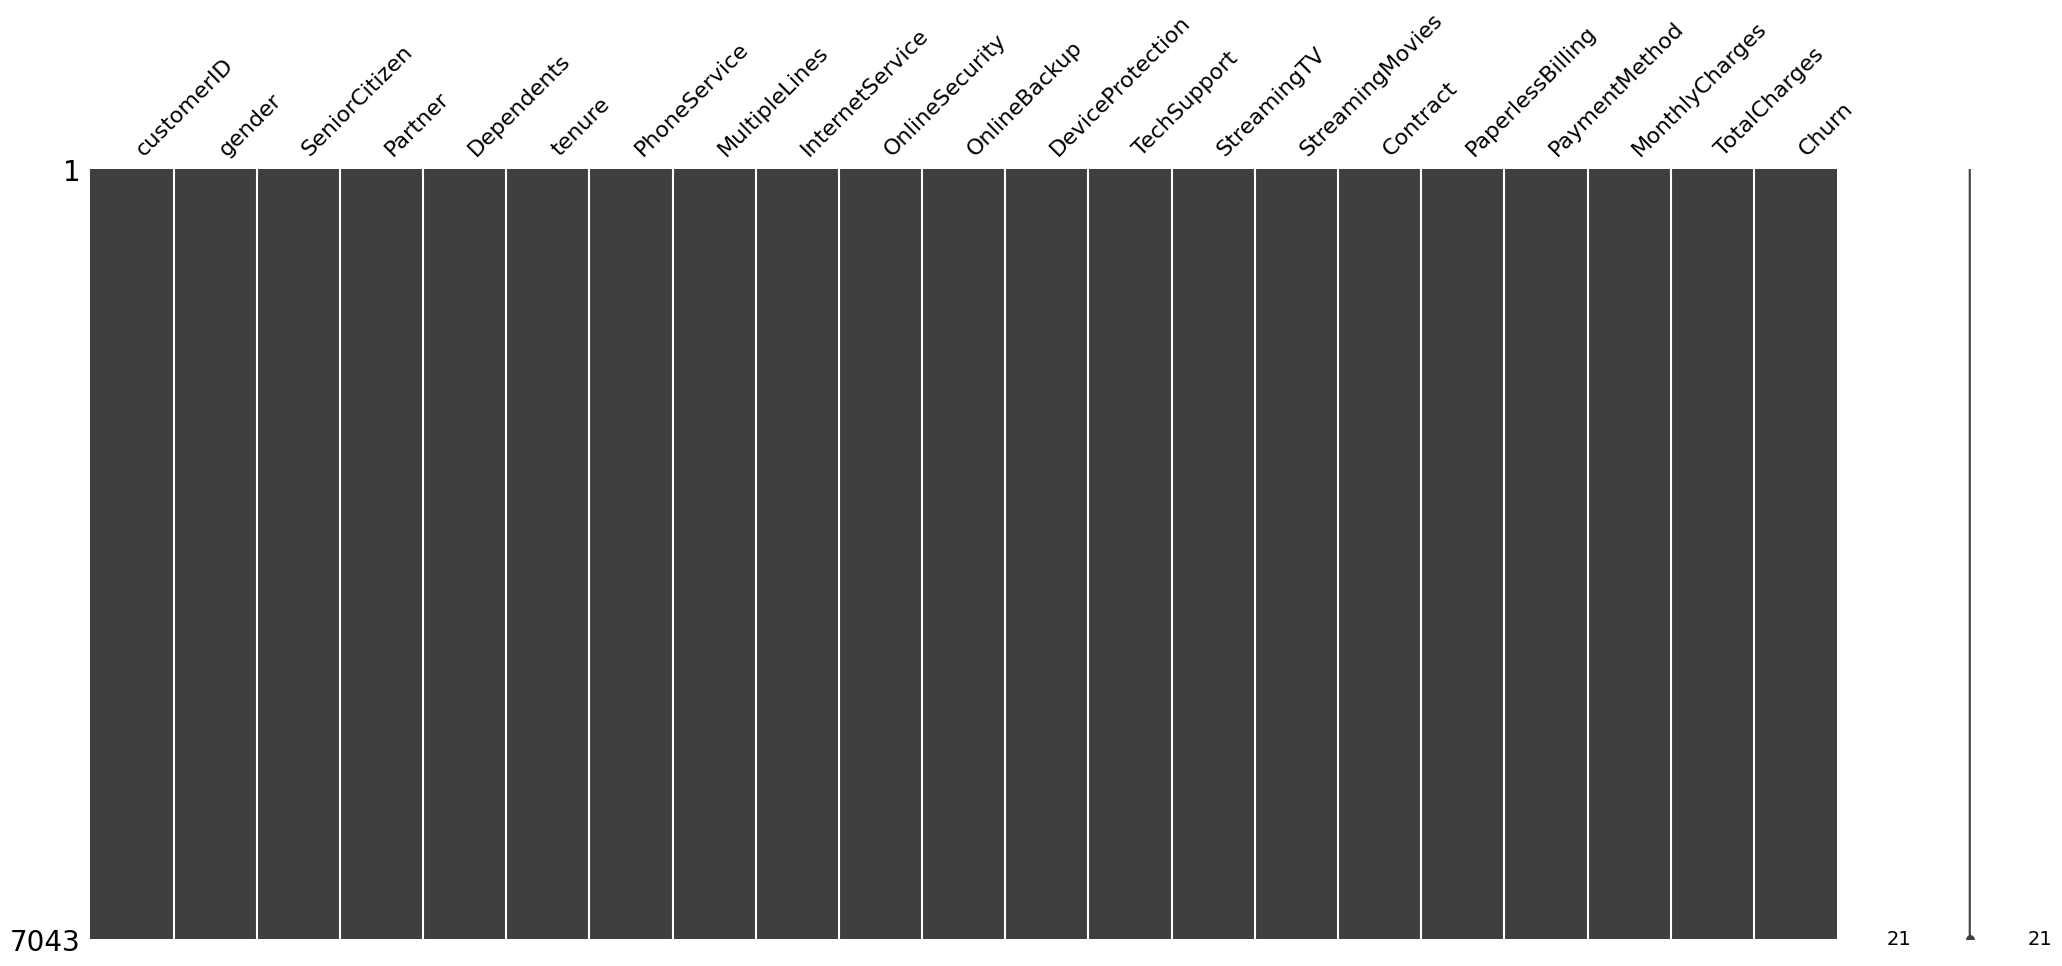

In [99]:
#finding patterns for missing variables using a plot
msno.matrix(df)

In [100]:
df= df.drop(['customerID'], axis=1 )

In [101]:
df['TotalCharges']= pd.to_numeric(df.TotalCharges, errors= 'coerce')
df['TotalCharges'].dtype

dtype('float64')

In [102]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [103]:
df= df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [104]:
df[df['tenure']== 0].index

Index([], dtype='int64')

In [105]:
df.fillna(df['TotalCharges'].mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [106]:
df['SeniorCitizen']= df['SeniorCitizen'].map({0: 'No',
                                              1: 'Yes'})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [108]:
df.InternetService.describe(include= ['object, bool'])

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

In [109]:
numerical_cols= ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [110]:
#data visualisation
g_labels= ['Males', 'Female']
c_labels= ['No', 'Yes']

#make subplots
#fig= make_su

In [111]:
df['Churn'][df['Churn']== "No"].groupby(by= df['gender']).count()

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [112]:
df['Churn'][df['Churn']== "Yes"].groupby(by= df['gender']).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

In [113]:
fig= px.histogram(df, x= 'Churn', color= 'Contract', barmode= 'group', title='<b>   Customer contract distribution<b>')
fig.update_layout(width=900, height=500, bargap= 0.2 )
fig.show()

In [114]:
labels, values= df['PaymentMethod'].unique(), df['PaymentMethod'].value_counts()
fig=go.Figure(data= [go.Pie(labels=labels, values= values, hole= .3)])
fig.update_layout(title_text= '<b> Payment Method distribution <b>', width=900, height=500,)
fig.show()

data preprocessing

In [115]:
#splitting the data into train and test sets 

def object_to_int(dataframe_series):
    if dataframe_series.dtype== "object":
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

df= df.apply(lambda x: object_to_int(x))

In [116]:
plt.figure(figsize= (14,7))
df.corr()['Churn'].sort_values(ascending= False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

In [117]:
#spliting the data 
X= df.drop(columns= ['Churn'])
y= df.Churn

In [118]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= .3, random_state= 40)

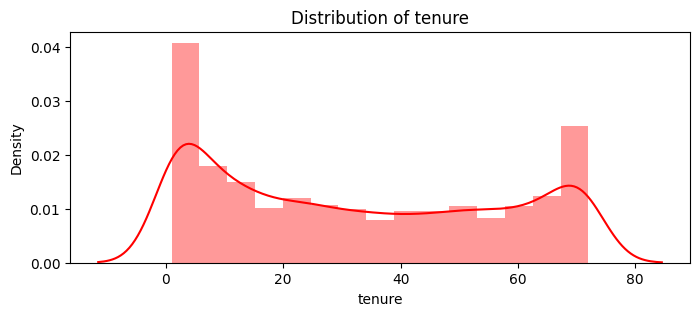

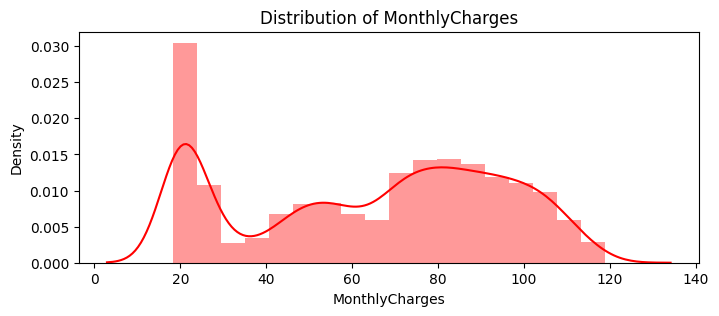

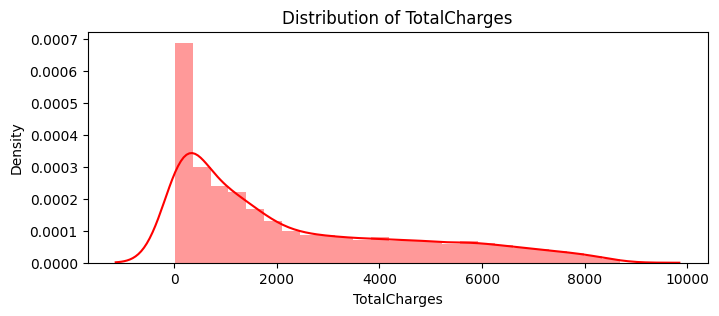

In [119]:
def displot(feature, frame, color= 'r'):
    plt.figure(figsize= (8,3))
    plt.title(f"Distribution of {feature}")
    ax= sns.distplot(frame[feature], color= color)
    
for feat in numerical_cols: displot(feat, df)

In [120]:
df_std= pd.DataFrame(StandardScaler().fit_transform(df[numerical_cols].astype('float64')), columns= numerical_cols)

# for feat in numerical_cols: distplot(feat, df_std, color= 'c')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [121]:
#divide the columns into the 3 categories  for standardisation

cat_cols_ohe= ['PaymentMethod', 'Contract', 'InternetService'] #one hot encoding
cat_cols_ole= list(set(X_train.columns)- set(numerical_cols)- set(cat_cols_ohe)) #label encoding

scaler= StandardScaler()
X_train[numerical_cols]= scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols]= scaler.fit_transform(X_test[numerical_cols])



In [122]:
# Machine learning 

# model evaluations and predictions

In [123]:
pd.plotting.scatter_matrix(frame=df['numerical_cols'], figsize= (12,5), diagonal= 'kde')
plt.show()

KeyError: 'numerical_cols'

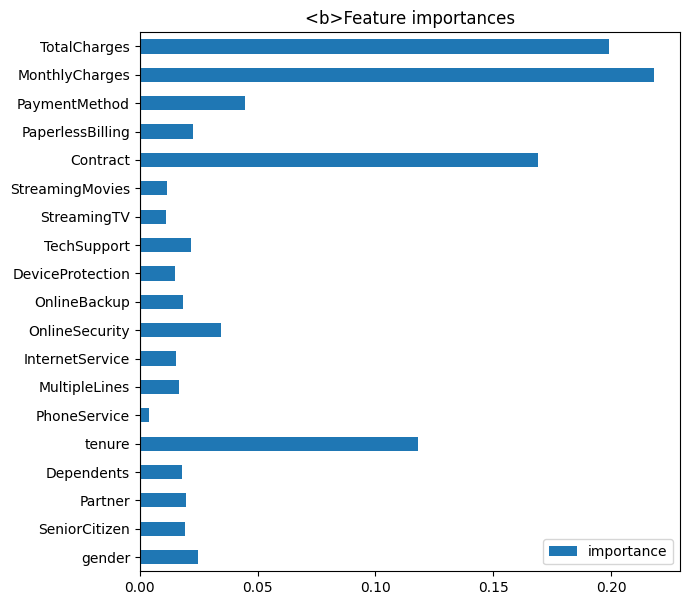

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model= RandomForestRegressor()
model.fit(X,y)
importances= pd.DataFrame(model.feature_importances_, columns= ['importance'],
                          index= X.columns)
importances.plot(kind= 'barh', figsize= (9,7))
plt.title('<b>Feature importances')
plt.axvline(x= 0, color= '.5')
plt.subplots_adjust(left= .3)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model= KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred= knn_model.predict(X_test)

print("knn accuracy: ",knn_model.score(X_test, y_test))
print(classification_report(y_test, y_pred))

knn accuracy:  0.7507109004739336
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1557
           1       0.53      0.50      0.51       553

    accuracy                           0.75      2110
   macro avg       0.68      0.67      0.67      2110
weighted avg       0.75      0.75      0.75      2110



              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1557
           1       0.53      0.50      0.51       553

    accuracy                           0.75      2110
   macro avg       0.68      0.67      0.67      2110
weighted avg       0.75      0.75      0.75      2110



SVC

In [ ]:
from sklearn.svm import SVC

svc_model= SVC(random_state= 1)
svc_model.fit(X_train, y_train)
y_pred= svc_model.predict(X_test)

print("svc accuracy: ",svc_model.score(X_test, y_test))
print(classification_report(y_test, y_pred))

svc accuracy:  0.7962085308056872
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1557
           1       0.65      0.47      0.55       553

    accuracy                           0.80      2110
   macro avg       0.74      0.69      0.71      2110
weighted avg       0.78      0.80      0.78      2110



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfm_model= RandomForestClassifier(n_estimators= 500, oob_score= True, n_jobs= -1,
                                  random_state= 50, max_leaf_nodes=30)
rfm_model.fit(X_train, y_train)
y_pred= rfm_model.predict(X_test)

print("rfm accuracy: ",rfm_model.score(X_test, y_test))
print(classification_report(y_test, y_pred))

rfm accuracy:  0.795260663507109
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1557
           1       0.65      0.47      0.54       553

    accuracy                           0.80      2110
   macro avg       0.74      0.69      0.71      2110
weighted avg       0.78      0.80      0.78      2110



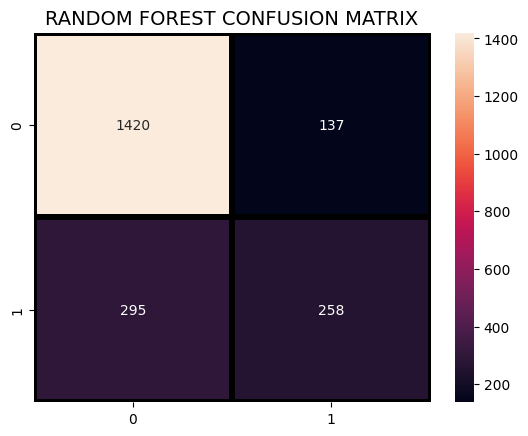

<Figure size 700x500 with 0 Axes>

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, fmt= 'd', linecolor= 'k', linewidth=3)
plt.title('RANDOM FOREST CONFUSION MATRIX', fontsize= 14)
plt.figure(figsize=(7,5))
plt.show()

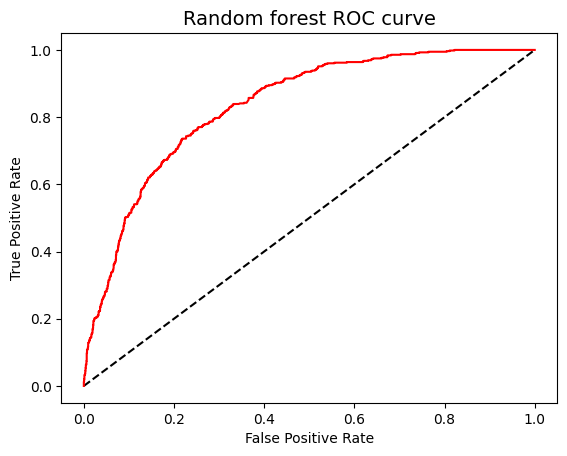

In [ ]:
rf_pred_prob= rfm_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds= roc_curve(y_test, rf_pred_prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr_rf, tpr_rf, label= 'Random Forest', color= 'r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random forest ROC curve', fontsize = 14)
plt.show()

         

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model= LogisticRegression(random_state= 1)
lr_model.fit(X_train, y_train)
y_pred= lr_model.predict(X_test)

print("lr accuracy: ",lr_model.score(X_test, y_test))
print(classification_report(y_test, y_pred))

lr accuracy:  0.7938388625592417
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1557
           1       0.63      0.53      0.57       553

    accuracy                           0.79      2110
   macro avg       0.73      0.71      0.72      2110
weighted avg       0.79      0.79      0.79      2110



In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model= DecisionTreeClassifier(random_state= 1)
dt_model.fit(X_train, y_train)
y_pred= dt_model.predict(X_test)

print("dt accuracy: ",dt_model.score(X_test, y_test))
print(classification_report(y_test, y_pred))

dt accuracy:  0.7113744075829384
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1557
           1       0.45      0.51      0.48       553

    accuracy                           0.71      2110
   macro avg       0.64      0.65      0.64      2110
weighted avg       0.72      0.71      0.72      2110



In [126]:
# Voting classifier

from sklearn.ensemble import VotingClassifier
cf1= GradientBoostingClassifier()
cf2= LogisticRegression()
cf3= RandomForestClassifier()
cf4= SVC()

ecf1 = VotingClassifier(estimators= [('gbc', cf1), ('lr', cf2), ('rfc', cf3)], voting= 'soft')
ecf1.fit(X_train, y_train)
y_pred= ecf1.predict(X_test)

print('final accuracy: ')
print(classification_report(y_test, y_pred))

final accuracy: 
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1557
           1       0.64      0.51      0.57       553

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110

